# Statistics Advanced - Assignment Answers

---

## Question 1: What is a random variable in probability theory?

**Answer:**

A **random variable** is a function that assigns a real number to each outcome in a sample space of a random experiment. It maps outcomes of a random process to numerical values, allowing probabilistic analysis and the computation of distributions, expectations, and variances. Random variables are typically denoted by capital letters like $X$, $Y$.

## Question 2: What are the types of random variables?

**Answer:**

There are two main types of random variables:

1. **Discrete random variables**: Take on a countable set of distinct values (e.g., number of heads in 10 coin flips). They have a probability mass function (PMF).
2. **Continuous random variables**: Take on values from a continuous range (e.g., heights, weights). They have a probability density function (PDF).

Additionally, one sometimes mentions **mixed** random variables (part discrete, part continuous).

## Question 3: Explain the difference between discrete and continuous distributions.

**Answer:**

- **Discrete distributions**: Defined for discrete random variables. Probabilities are assigned to specific values. The PMF $P(X=x)$ gives the probability that $X$ equals a particular value. Example: Binomial, Poisson.

- **Continuous distributions**: Defined for continuous random variables. Probabilities for exact values are 0; instead, probabilities are computed over intervals using the PDF $f(x)$ and integrals: $P(a\le X\le b)=\int_a^b f(x)\,dx$. Example: Normal, Exponential.

Key conceptual difference: discrete values vs continuous ranges; PMF vs PDF; sums vs integrals for probability calculations.

## Question 4: What is a binomial distribution, and how is it used in probability?

**Answer:**

The **binomial distribution** models the number of successes in a fixed number $n$ of independent Bernoulli trials, each with the same probability of success $p$. The probability of observing exactly $k$ successes is:

$$P(X=k)=\binom{n}{k}p^k(1-p)^{n-k},\quad k=0,1,\dots,n.$$

It is used when there are repeated independent trials with two outcomes (success/failure), such as coin flips, quality-control pass/fail checks, or survey responses (yes/no). Mean: $np$, Variance: $np(1-p)$.

## Question 5: What is the standard normal distribution, and why is it important?

**Answer:**

The **standard normal distribution** is the normal (Gaussian) distribution with mean 0 and standard deviation 1, usually denoted $Z\sim N(0,1)$. Its PDF is:

$$f(z)=\frac{1}{\sqrt{2\pi}}e^{-z^2/2}.$$

Importance:
- Many real-world phenomena approximate a normal distribution.
- Standardization: Any normal variable $X\sim N(\mu,\sigma^2)$ can be converted to the standard normal via $Z=(X-\mu)/\sigma$, allowing use of standard tables.
- The standard normal underpins many statistical methods and inference procedures, including z-tests and the Central Limit Theorem.

## Question 6: What is the Central Limit Theorem (CLT), and why is it critical in statistics?

**Answer:**

The **Central Limit Theorem** states that, for a large enough sample size $n$, the sampling distribution of the sample mean (or sum) of independent, identically distributed random variables with finite mean and variance approaches a normal distribution, regardless of the original variable's distribution. Formally, if $X_1,\dots,X_n$ are i.i.d. with mean $\mu$ and variance $\sigma^2$, then:

$$\frac{\overline{X}-\mu}{\sigma/\sqrt{n}}\xrightarrow{d} N(0,1) \quad\text{as } n\to\infty.$$

Why critical:
- Allows use of normal-based inference (confidence intervals, hypothesis tests) even when underlying data are not normal, given sufficiently large $n$.
- Provides theoretical justification for many practical statistical techniques.

## Question 7: What is the significance of confidence intervals in statistical analysis?

**Answer:**

A **confidence interval (CI)** gives a range of plausible values for an unknown population parameter (e.g., mean or proportion) computed from sample data. A 95% CI for a parameter means that, under repeated sampling, approximately 95% of such intervals will contain the true parameter value.

Significance:
- Quantifies uncertainty around point estimates.
- Helps make decisions by showing precision (interval width) and reliability (confidence level).
- Used widely in reporting results and in hypothesis testing (if a CI excludes a null value, it corresponds to rejection at the associated significance level).

## Question 8: What is the concept of expected value in a probability distribution?

**Answer:**

The **expected value** (or expectation, mean) of a random variable is its long-run average value after many independent repetitions of the experiment. For a discrete variable $X$ with values $x_i$ and probabilities $p_i$,

$$E[X]=\sum_i x_i p_i.$$

For a continuous variable with PDF $f(x)$,

$$E[X]=\int_{-\infty}^{\infty} x f(x)\,dx.$$

The expected value summarizes the center of a distribution and is used in decision-making, risk assessment, and as a parameter in many statistical procedures.

## Question 9: Generate 1000 random numbers from Normal(mean=50, sd=5). Compute mean & sd and draw a histogram.

**Answer (code + output):**

Sample mean: 49.7737
Sample standard deviation (sample sd): 4.9376


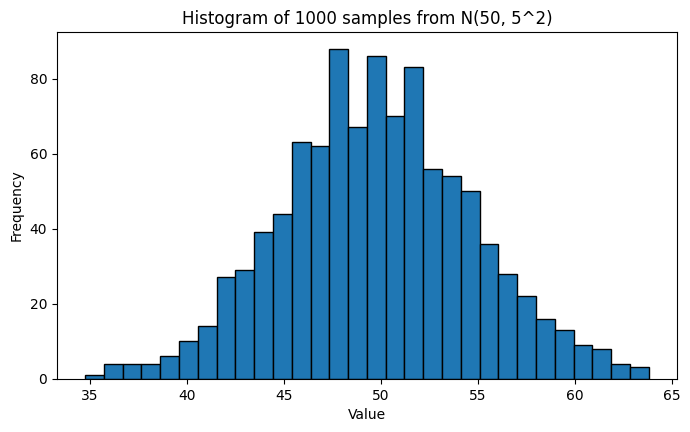

In [1]:
# Question 9: Generate samples from a normal distribution, compute mean & sd, and plot histogram.
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # for reproducibility
samples = np.random.normal(loc=50, scale=5, size=1000)

sample_mean = samples.mean()
sample_std = samples.std(ddof=1)  # sample standard deviation (n-1)

print(f"Sample mean: {sample_mean:.4f}")
print(f"Sample standard deviation (sample sd): {sample_std:.4f}")

# Plot histogram
plt.figure(figsize=(8,4.5))
plt.hist(samples, bins=30, edgecolor='black')
plt.title('Histogram of 1000 samples from N(50, 5^2)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

## Question 10: Applying CLT to estimate average sales with 95% CI

**Problem:** You have daily sales data for 2 years (here a sample list of 20 days provided). Use the CLT to estimate the average sales with a 95% confidence interval and write Python code to compute mean and CI.

**Approach (explanation):**

- Treat the daily sales as a sample from the population of daily sales.
- By the Central Limit Theorem, the sample mean approximately follows a normal distribution with mean $\mu$ (true mean) and standard error $\sigma/\sqrt{n}$, where $\sigma$ is the population SD. If $\sigma$ is unknown, use the sample SD and the t-distribution for small samples.
- For a 95% CI for the mean when population SD is unknown and sample size is small, use the t-distribution:

$$\overline{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$$

where $s$ is the sample standard deviation and $t_{\alpha/2,n-1}$ is the critical t-value for 95% CI.

**Python code and output:**

In [2]:
import numpy as np
import scipy.stats as stats

daily_sales = [220, 245, 210, 265, 230, 250, 260, 275, 240, 255,
               235, 260, 245, 250, 225, 270, 265, 255, 250, 260]

data = np.array(daily_sales)
n = len(data)
mean = data.mean()
sd_sample = data.std(ddof=1)
se = sd_sample / np.sqrt(n)

# 95% CI using t-distribution
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
ci_lower = mean - t_crit * se
ci_upper = mean + t_crit * se

print(f"n = {n}")
print(f"Sample mean = {mean:.4f}")
print(f"Sample SD = {sd_sample:.4f}")
print(f"Standard error = {se:.4f}")
print(f"t critical (df={n-1}) = {t_crit:.4f}")
print(f"95% CI for mean: ({ci_lower:.4f}, {ci_upper:.4f})")

n = 20
Sample mean = 248.2500
Sample SD = 17.2653
Standard error = 3.8606
t critical (df=19) = 2.0930
95% CI for mean: (240.1696, 256.3304)
